# Diabetes case study 

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### Getting the data

In [2]:
df = pd.read_csv("dia.csv")

# 1. Data exploration

In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


##### Age: the age of each pacient. 
##### Gender: Male or Female.
##### Polyuria: It is excessive or an abnormally large production or passage of urine. The options are Yes or No. 
##### Polydipsia: It is excessive thirst or excess drinking.  The options are Yes or No.
##### Sudden weight loss:  The options are Yes or No.
##### Weakness:  The options are Yes or No.
##### Polyphagia: It is an abnormally strong sensation of hunger or desire to eat often leading to or accompanied by overeating.  The options are Yes or No.
##### Genital thrush: It is a common condition caused by a type of yeast called Candida. The options are Yes or No.
##### Visual blurring: The options are Yes or No.
##### Itching: The options are Yes or No.
##### Irritability: The options are Yes or No.
##### Delayed healing: The options are Yes or No.
#### Partial paresis: The options are Yes or No.
#### Muscle stiffness: The options are Yes or No.
#### Alopecia: The options are Yes or No.
#### Obesity: The options are Yes or No.
#### Class: If the diabetes is positive or negative.

In [4]:
df.shape

(520, 17)

In [5]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [6]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [7]:
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

###  1.1 Converting strings to continuos variable.

##### In order to see how the others features influence, it is necesary to convert the string variables into continues variables. As all the categorical features are binary then we can convert into 0 and 1 values. 

In [8]:
df['class'].replace(to_replace=['Positive','Negative'], value=[1,0],inplace=True)
df['Polyuria'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['Polydipsia'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['sudden weight loss'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['weakness'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['Polyphagia'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['Genital thrush'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['visual blurring'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['Itching'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['Irritability'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['delayed healing'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['partial paresis'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['muscle stiffness'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['Alopecia'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['Obesity'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)

df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


### Let see if there is any correlation between the different columns

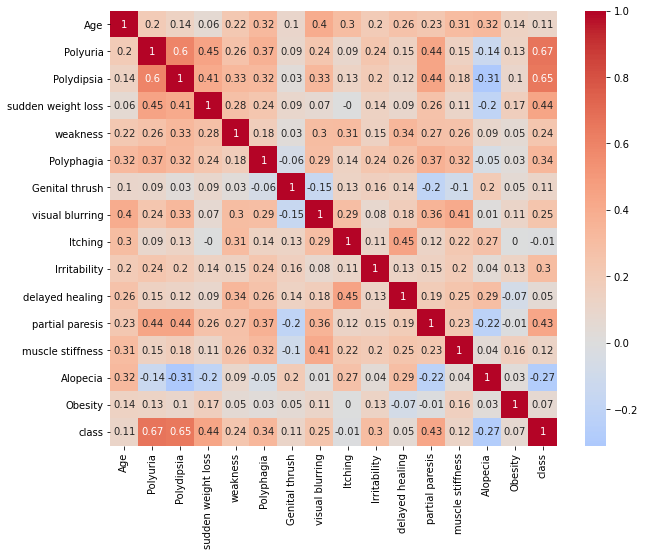

In [9]:
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(10,8))
sns.heatmap(data=correlation_matrix, annot=True, center=0.0, cmap='coolwarm')

### 1.2 Let's see how some features influence the diabetes risk

##### But, first let's see the total diabetes rate

In [10]:
df['class'].sum() / df['class'].count()

0.6153846153846154

### a) Age

Text(0.5, 1.0, 'Age histogram')

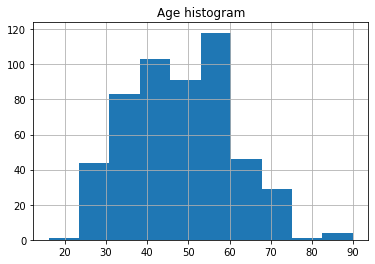

In [11]:
df['Age'].hist().set_title('Age histogram')

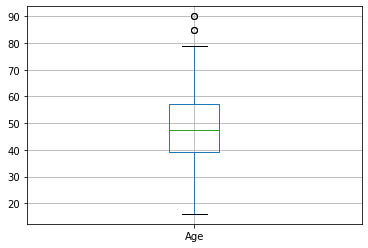

In [12]:
df.boxplot(column=['Age'])

In [13]:
df['Age'].mean()

48.02884615384615

##### Which is the mean age for each gender

In [14]:
df.groupby('Gender')['Age'].mean()

Gender
Female    47.031250
Male      48.612805
Name: Age, dtype: float64

### How does the age influence the diabetes rate

/Users/Lilosa/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


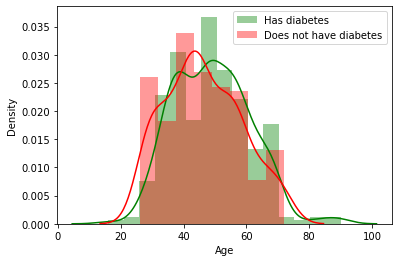

In [15]:
sns.distplot( df[df['class']==1]['Age'] , kde=True, label='Has diabetes', color='g')
sns.distplot( df[df['class']==0]['Age'] , kde=True, label='Does not have diabetes', color='r')

plt.legend(prop={'size': 10})

### Old people

##### Now let's count for people above 60 years, and see how this sickness affects

In [16]:
(df['Age'] > 60).sum()

80

##### How it is the rate of diabetes of older people

In [17]:
df_old = df[df['Age'] >= 60]
df_old['class'].sum() / len(df_old['class'])

0.6947368421052632

##### More than 50% of the old people seems to have diabetes

##### How the gender influence for old people

In [18]:
df_old.groupby('Gender')['class'].mean()

Gender
Female    0.965517
Male      0.575758
Name: class, dtype: float64

##### Seems that women are more propense to get diabetes when they are old

### Young people

##### Now let's count for people under 20 years, and see how this sickness affects

In [19]:
(df['Age'] <= 20).sum()

1

##### We don't have enough statistics to make this study

### b) Gender

### How does the sex influence the diabetes rate

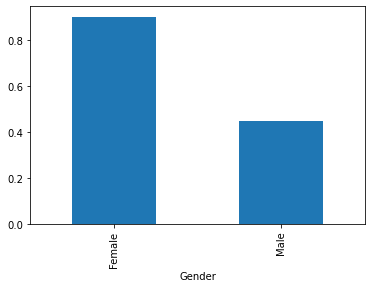

In [20]:
df.groupby('Gender')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

##### Seems that women have a higher tendency to have diabetes

### How the sex and the age influence in the diabetes rate?

Text(0, 0.5, 'Diabetes ratio')

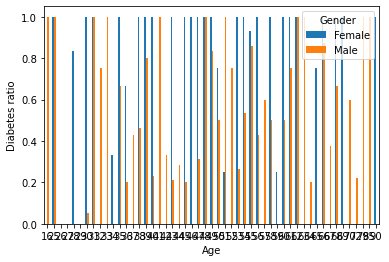

In [21]:
fig, ax1 = plt.subplots()
df.pivot_table(index='Age', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

### c) Polyuria

### How does Polyuria influence the diabetes

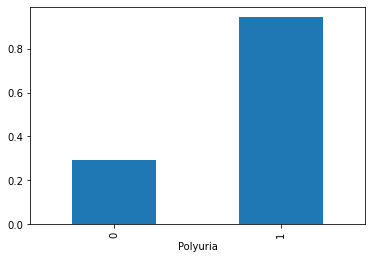

In [22]:
df.groupby('Polyuria')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the Polyuria influence the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

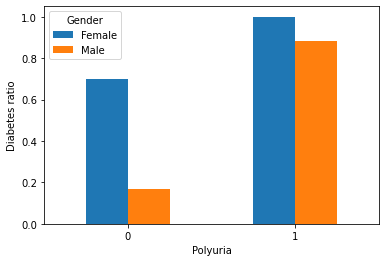

In [23]:
fig, ax1 = plt.subplots()
df.pivot_table(index='Polyuria', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

### d) Polydipsia

### How does Polydipsia influence the diabetes

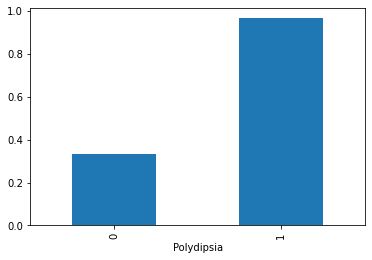

In [24]:
df.groupby('Polydipsia')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the Polydipsia influence the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

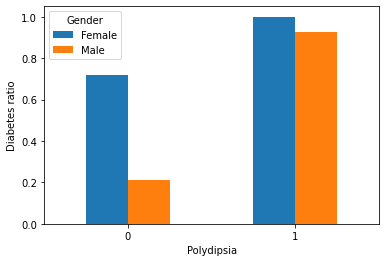

In [25]:
fig, ax1 = plt.subplots()
df.pivot_table(index='Polydipsia', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

### Acording to the table of correlation the features of Polyuria y Polydipsia are high related

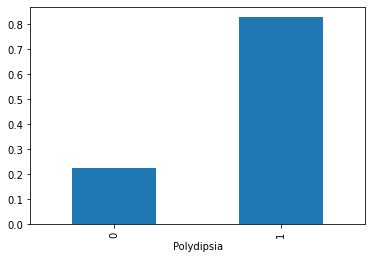

In [26]:
df.groupby('Polydipsia')['Polyuria'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### e) Sudden weight loss

### How does sudden weight loss influenciate the diabetes

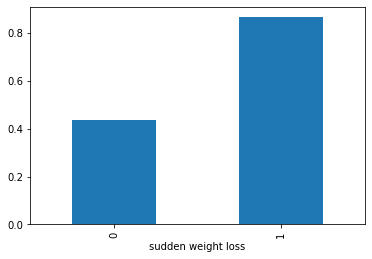

In [27]:
df.groupby('sudden weight loss')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the sudden weight loss influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

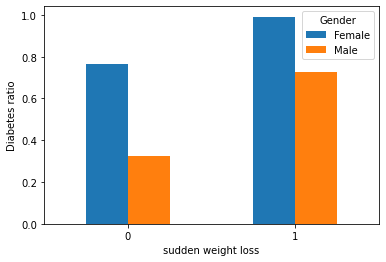

In [28]:
fig, ax1 = plt.subplots()
df.pivot_table(index='sudden weight loss', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

### f)  Weakness

### How does weakness influenciate the diabetes

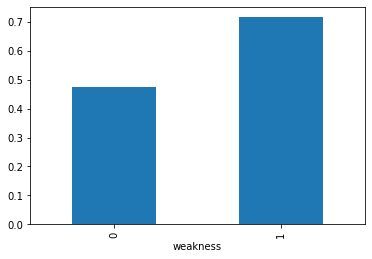

In [29]:
df.groupby('weakness')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the weakness influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

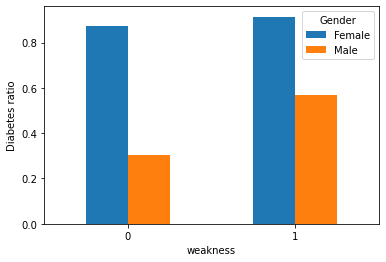

In [30]:
fig, ax1 = plt.subplots()
df.pivot_table(index='weakness', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

### g) Polyphagia

### How does Polyphagia influenciate the diabetes

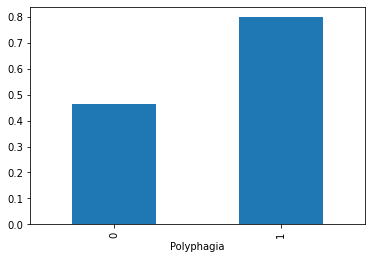

In [31]:
df.groupby('Polyphagia')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the Polyphagia influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

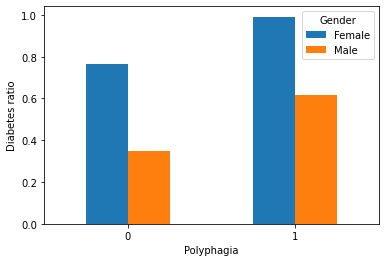

In [32]:
 fig, ax1 = plt.subplots()
df.pivot_table(index='Polyphagia', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

### h) Genital thrush

### How does Genital thrush influenciate the diabetes

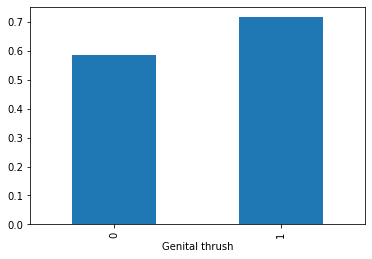

In [33]:
df.groupby('Genital thrush')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the Genital thrush influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

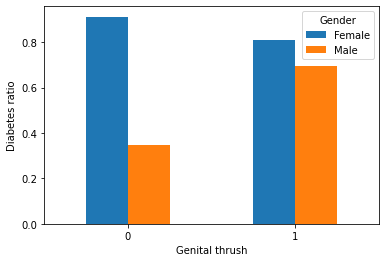

In [34]:
fig, ax1 = plt.subplots()
df.pivot_table(index='Genital thrush', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

### i) Visual blurring

### How does visual blurring influenciate the diabetes

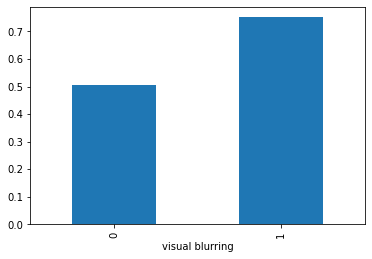

In [35]:
df.groupby('visual blurring')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the visual blurring influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

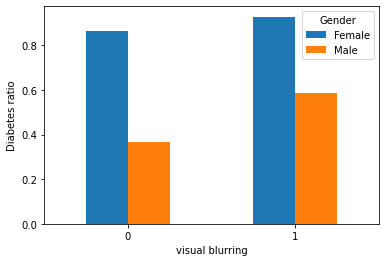

In [36]:
 fig, ax1 = plt.subplots()
df.pivot_table(index='visual blurring', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

### j) Itching

### How does Itching influenciate the diabetes

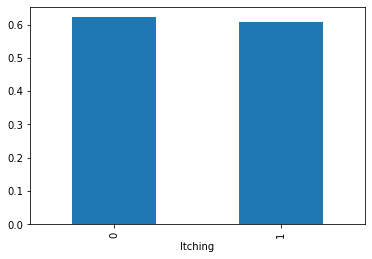

In [37]:
df.groupby('Itching')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the Itching influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

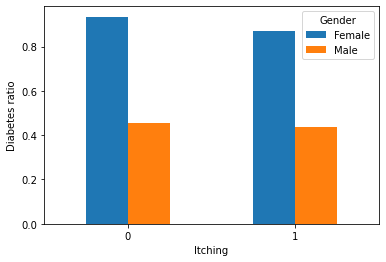

In [38]:
 fig, ax1 = plt.subplots()
df.pivot_table(index='Itching', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

##### This particular feature seems to don't influence the diabetes rate

In [39]:
df.drop(columns=['Itching'], inplace= True)

### k) Irritability

### How does Irritability influenciate the diabetes

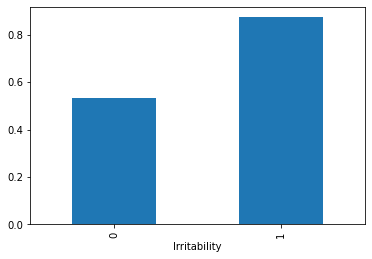

In [40]:
df.groupby('Irritability')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the Irritability influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

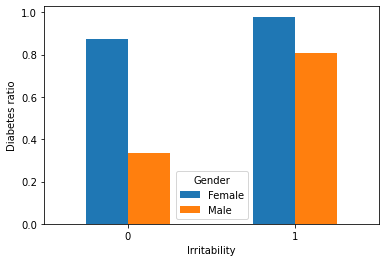

In [41]:
 fig, ax1 = plt.subplots()
df.pivot_table(index='Irritability', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

### l) Delayed healing

### How does delayed healing influenciate the diabetes

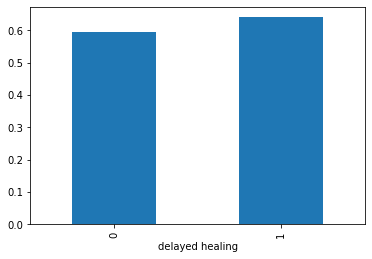

In [42]:
df.groupby('delayed healing')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the delayed healing influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

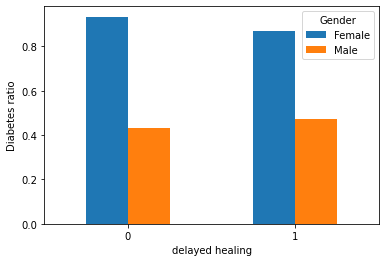

In [43]:
 fig, ax1 = plt.subplots()
df.pivot_table(index='delayed healing', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

### This particular feature seems to don't influence the diabetes rate

In [44]:
df.drop(columns=['delayed healing'], inplace= True)

### m) Partial paresis

### How does Partial paresis influenciate the diabetes

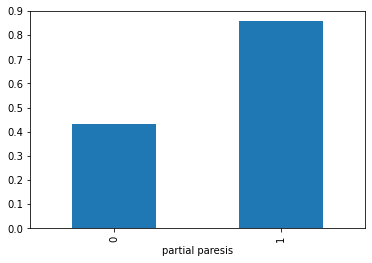

In [45]:
df.groupby('partial paresis')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the partial paresis influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

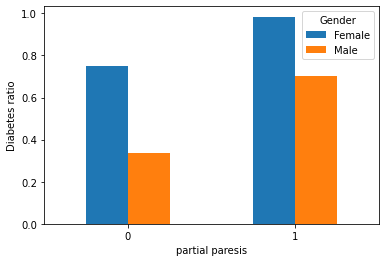

In [46]:
 fig, ax1 = plt.subplots()
df.pivot_table(index='partial paresis', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

### g) Partial muscle stiffness

### How does muscle stiffness influenciate the diabetes

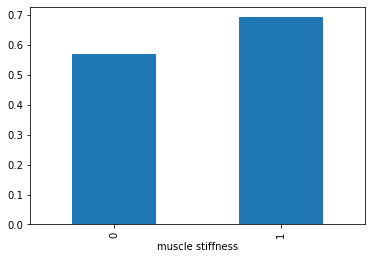

In [47]:
df.groupby('muscle stiffness')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the partial muscle stiffness influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

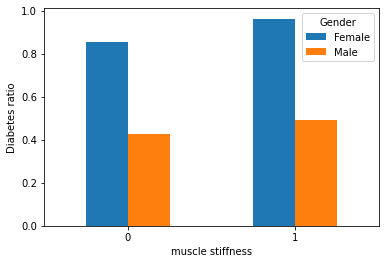

In [48]:
 fig, ax1 = plt.subplots()
df.pivot_table(index='muscle stiffness', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

### h) Alopecia

### How does Alopecia influenciate the diabetes

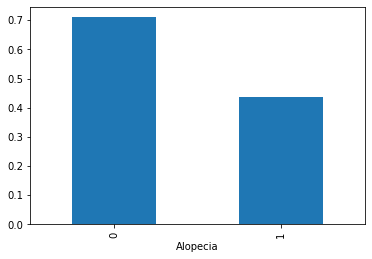

In [49]:
df.groupby('Alopecia')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the Alopecia influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

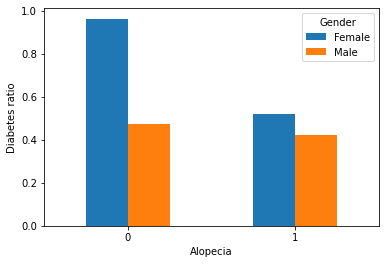

In [50]:
 fig, ax1 = plt.subplots()
df.pivot_table(index='Alopecia', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

### i) Obesity

### How does Obesity influenciate the diabetes

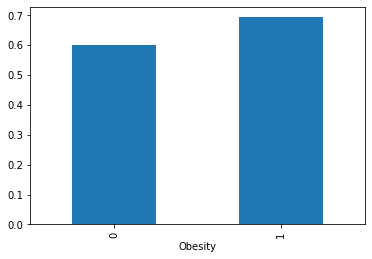

In [51]:
df.groupby('Obesity')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the Obesity influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

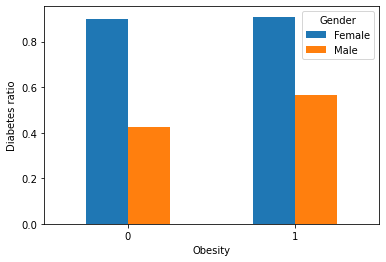

In [52]:
 fig, ax1 = plt.subplots()
df.pivot_table(index='Obesity', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

### 1.3 Missing values

In [53]:
columns_nan = df.isna().sum()
columns_nan

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Irritability          0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

##### We don't have any missing values

### 1.4 Convertion of gender column

In [54]:
categorical_var = df[['Gender']]
categorical_dummies = pd.get_dummies(categorical_var)

In [55]:
categorical_dummies.head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [56]:
df.drop(['Gender'], axis=1, inplace= True)
df = pd.concat([df, categorical_dummies], axis=1)

In [57]:
df.head()

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Irritability,partial paresis,muscle stiffness,Alopecia,Obesity,class,Gender_Female,Gender_Male
0,40,0,1,0,1,0,0,0,0,0,1,1,1,1,0,1
1,58,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1
2,41,1,0,0,1,1,0,0,0,0,1,1,0,1,0,1
3,45,0,0,1,1,1,1,0,0,0,0,0,0,1,0,1
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1


# 2. Machine learning

### 2.1 Machine learning models that does not need normalization

##### a) Preparing data

In [59]:
X = df.drop('class',1).values
y = df['class'].values

##### b) Train and Test split

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (416, 15) (416,)
Test set: (104, 15) (104,)


### c) Random Forest

##### Testing the hyperparameters

In [62]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    rf_diabetes = RandomForestClassifier(criterion='gini', 
                        n_estimators=10000,
                        max_depth=n,
                        min_samples_split=2,
                        min_samples_leaf=2,
                        max_features=None,
                        oob_score='auto',
                        random_state=1400,
                        n_jobs=-1).fit(X_train,y_train)
 
    random_Forest_predictionmetier = rf_diabetes.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, random_Forest_predictionmetier)

    std_acc[n-1]=np.std(random_Forest_predictionmetier==y_test)/np.sqrt(random_Forest_predictionmetier.shape[0])

mean_acc

array([0.84615385, 0.84615385, 0.92307692, 0.95192308, 0.97115385,
       0.97115385, 0.97115385, 0.98076923, 0.98076923, 0.98076923,
       0.98076923, 0.98076923, 0.98076923, 0.98076923])

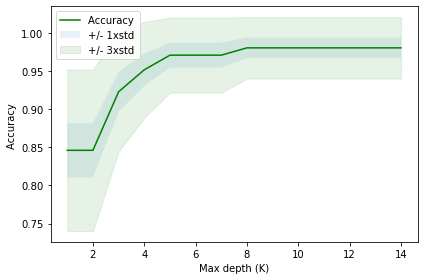

In [63]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Max depth (K)')
plt.tight_layout()
plt.show()

##### Modeling

In [70]:
rf_diabetes = RandomForestClassifier(criterion='gini', 
                        n_estimators=300,
                        max_depth=8,
                        min_samples_split=4,
                        min_samples_leaf=7,
                        max_features='auto',
                        oob_score=True,
                        random_state=1400,
                        n_jobs=-1)

rf_diabetes.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=7, min_samples_split=4,
                       n_estimators=300, n_jobs=-1, oob_score=True,
                       random_state=1400)

##### Prediction

In [71]:
Random_Forest_predictiondiabetes = rf_diabetes.predict(X_test)

##### Evaluation

In [72]:
print("Train Random Forest's Accuracy: ", metrics.accuracy_score(y_train, rf_diabetes.predict(X_train)))

Train Random Forest's Accuracy:  0.9471153846153846


In [73]:
print("Test Random Forest's Accuracy: ", metrics.accuracy_score(y_test, Random_Forest_predictiondiabetes))

Test Random Forest's Accuracy:  0.9326923076923077


### 2.2 Machine learning models need normalization

##### a) Normalize

In [74]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

##### b) Train and test split

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (416, 15) (416,)
Test set: (104, 15) (104,)


### Logistic Regression

##### Modeling

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR_diabetes = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

##### Prediction

In [77]:
Linear_Regression_predictiondiabetes = LR_diabetes.predict(X_test)

###### Evaluation

In [80]:
print("Train Logistic Regresion's Accuracy: ", metrics.accuracy_score(y_train, LR_diabetes.predict(X_train)))

Train Logistic Regresion's Accuracy:  0.8846153846153846


In [81]:
print("Test Logistic Regresion's Accuracy: ", metrics.accuracy_score(y_test, Linear_Regression_predictiondiabetes))

Test Logistic Regresion's Accuracy:  0.8846153846153846


### K-Nearest Neighbors

##### Testing the hyperparameters

In [82]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_neigh=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_neigh)

    
    std_acc[n-1]=np.std(yhat_neigh==y_test)/np.sqrt(yhat_neigh.shape[0])

mean_acc

array([0.96153846, 0.96153846, 0.97115385, 0.94230769, 0.94230769,
       0.94230769, 0.95192308, 0.93269231, 0.94230769])

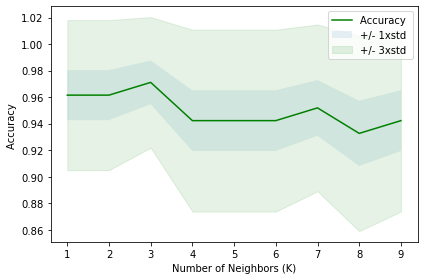

In [83]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

##### Modeling

In [84]:
neigh = KNeighborsClassifier(n_neighbors = 3).fit(X_train,y_train)

##### Prediction

In [85]:
yhat_neigh=neigh.predict(X_test)

##### Evaluation

In [89]:
print("Train KNN's Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))

Train KNN's Accuracy:  0.9807692307692307


In [90]:
print("Test KNN's Accuracy: ", metrics.accuracy_score(y_test, yhat_neigh))

Test KNN's Accuracy:  0.9711538461538461


# Conclusion:  The best accuracy was obtained with KNN.